# Explorační analýza, vizualizace a ML model pro predikci ceny automobilu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

C:\Python\Python396\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python\Python396\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Python\Python396\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
auta = pd.read_csv('auta_nova.csv', index_col = False).drop(['Unnamed: 0'], axis=1)
auta.head()

,id,znacka,model,cena,rok,tachometr,motor,prevodovka,barva,karoserie,palivo
0,"Alfa Romeo 159, 2007_371",Alfa Romeo,Alfa Romeo 159,74000,2007,235177,110,Manuál,stříbrná-metalíza,Combi,Diesel
1,"Alfa Romeo 159, 2008_1894",Alfa Romeo,Alfa Romeo 159,106000,2008,196092,110,Automat,šedá-metalíza,Combi,Diesel
2,"Alfa Romeo Giulietta, 2018_2882",Alfa Romeo,Alfa Romeo Giulietta,311000,2018,84788,88,Manuál,šedá-metalíza,Hatchback,Diesel
3,"Audi A3, 2009_2688",Audi,Audi A3,180000,2009,199896,118,Manuál,šedá-metalíza,Hatchback,Benzín
4,"Audi A3, 2009_2765",Audi,Audi A3,200000,2009,122236,75,Automat,bílá,Hatchback,Benzín


#### Kontrola, že datové typy jsou správné a žádné hodnoty nechybí

In [3]:
auta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2936 non-null   object
 1   znacka      2936 non-null   object
 2   model       2936 non-null   object
 3   cena        2936 non-null   int64 
 4   rok         2936 non-null   int64 
 5   tachometr   2936 non-null   int64 
 6   motor       2936 non-null   int64 
 7   prevodovka  2936 non-null   object
 8   barva       2936 non-null   object
 9   karoserie   2936 non-null   object
 10  palivo      2936 non-null   object
dtypes: int64(4), object(7)
memory usage: 252.4+ KB


## Základní statistické údaje numerických proměnných

In [4]:
auta.describe().T

,count,mean,std,min,25%,50%,75%,max
cena,2936.0,383691.249319,154264.491522,74000.0,270000.0,365000.0,470000.00,1300000.0
rok,2936.0,2015.326975,2.848120,2004.0,2014.0,2016.0,2017.00,2021.0
tachometr,2936.0,136765.255790,59866.599349,5917.0,92385.0,138970.5,176322.75,452450.0
motor,2936.0,109.801771,30.131323,50.0,86.0,110.0,125.00,344.0


##### Základní poznatky:

- Nejnižší cena je 74 000 Kč.
- Nejvyšší cena je 1 300 000 Kč.
- Nejstarší auto je z roku 2004.
- První kvartil (25. percentil) proměnné rok je 2014. To znamená, že více než 75 % aut jsou modely vyrobené po roce 2014.

## Přehled vztahů mezi proměnnými a jejich rozděleními (pairplot)

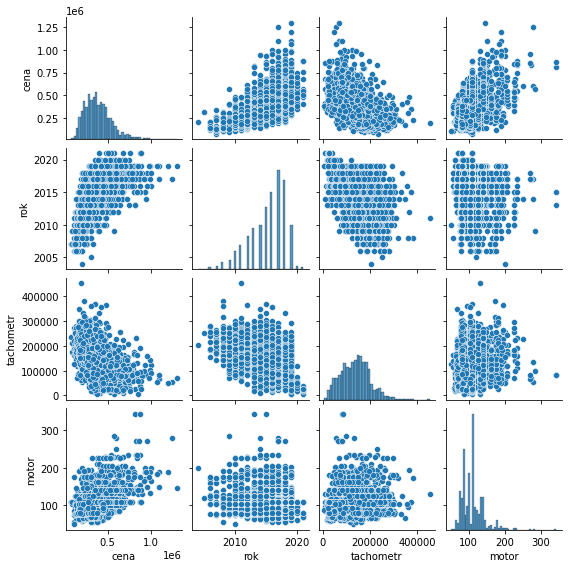

In [5]:
sns.pairplot(auta, height = 2, palette = 'Blues')

# Tvorba vizualizací:
#### - Počet aut dle značky
#### - Rozdělení ceny celého vzorku
#### - Rozdělení cen dle značek
#### - Rozdělení hodnot tachometru
#### - Vztah závislosti ceny na tachometru
#### - Změna ceny v závislosti na roku uvedení do provozu

## Počet aut dle značky

In [6]:
znacky_pocet = auta['znacka'].value_counts().reset_index()
znacky_pocet.rename(columns={'index':'znacka', 'znacka':'pocet'}, inplace=True)
znacky_pocet['procenta'] = znacky_pocet['pocet']/sum(znacky_pocet['pocet'])*100

Text(250, -1.6, 'Počet aut dle značky')

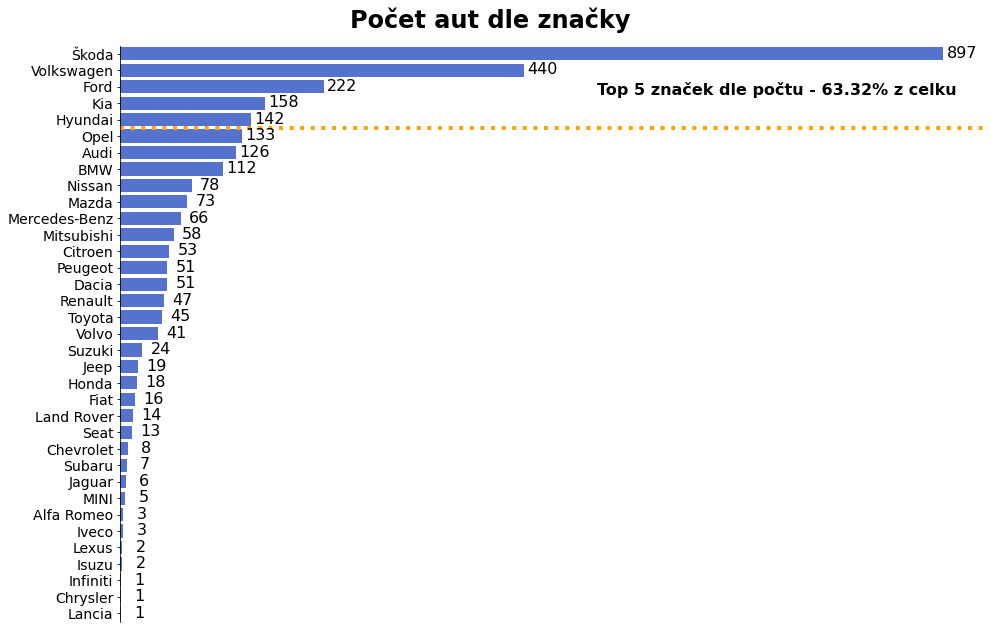

In [7]:
fig = plt.figure(figsize=(12, 8))
axes = fig.add_axes([0, 0, 1, 1])

# tvorba grafu
sns.barplot(y = znacky_pocet['znacka'], x = znacky_pocet['pocet'], color = '#4169E1', ax=axes)

# uprava oznaceni hodnot na osach
plt.yticks(color='black', fontsize=14)
plt.xticks([])

# smazat oznaceni os
axes.set_xlabel('')
axes.set_ylabel('')

# ponechat pouze levou osu
axes.spines[['right', 'top', 'bottom']].set_visible(False)

# anotace jednotlivých sloupců
for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (20+ width, y + height*0.8), ha='center', fontsize=16, color='black')

# přidání předělovací přerušované čáry
axes.axhline(4.51, linestyle = ':', color = 'orange', xmin = 0, xmax = 1220, lw=4)

# přidání komentáře
axes.text(520, 2.5, 
          f'''Top 5 značek dle počtu - {round(sum(znacky_pocet['procenta'][:5]),2)}% z celku''', 
          fontweight='bold', color='black', fontsize=16)

# přidání nadpisu
axes.text(250, -1.6, 'Počet aut dle značky', color='black', fontsize=24, fontweight='bold')

## Rozdělení ceny

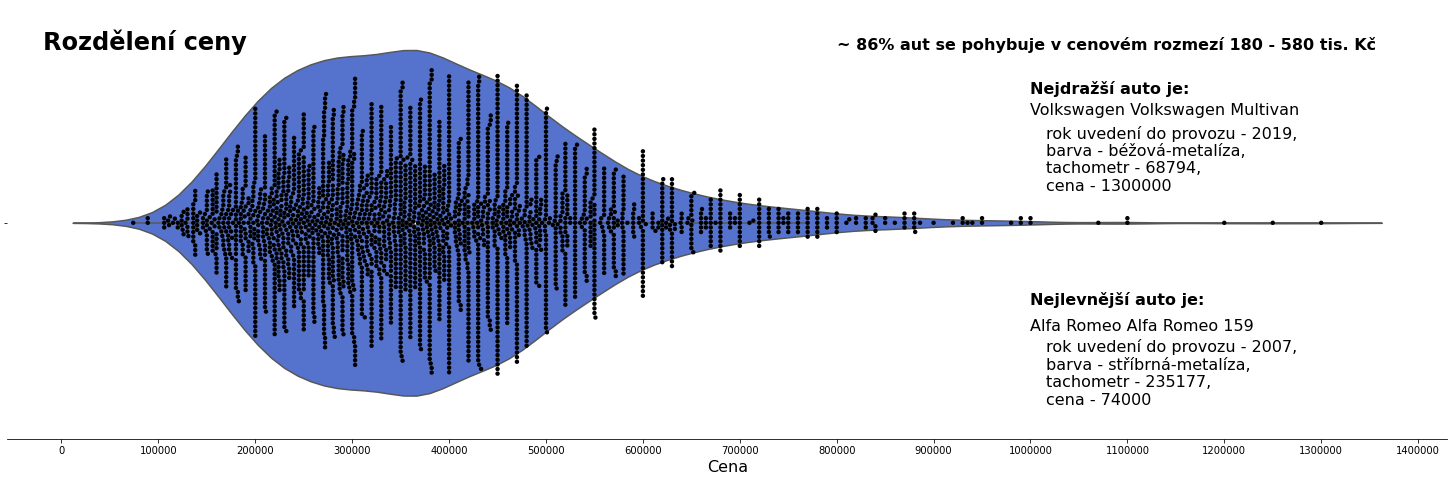

In [8]:
fig = plt.figure(figsize=(20, 6))
axes = fig.add_axes([0, 0, 1, 1])

# tvorba grafů
sns.violinplot(x=auta['cena'], color = '#4169E1', ax=axes)
sns.swarmplot(x=auta['cena'], color = 'black', ax=axes, size=4.4)

# ponechat pouze spodní osu
axes.spines[['right', 'top', 'left']].set_visible(False)

# označení osy x
axes.set_xlabel('Cena', color='black', fontsize=16)

# intervaly hodnot osy x
axes.set_xticks(range(0,1500000, 100000))

# nadpis
axes.text(-19000, -0.4, 'Rozdělení ceny', color='black', fontsize=24, fontweight='bold')

# komentář nejdražší auto
axes.text(800000, -0.4, f"~ {round(len(auta[auta['cena']>=180000][auta[auta['cena']>=180000]['cena']<=580000])/len(auta)*100)}% aut se pohybuje v cenovém rozmezí 180 - 580 tis. Kč", fontsize=16, color='black', fontweight='bold')
axes.text(1000000, -0.3, 'Nejdražší auto je:', fontsize=16, color='black', fontweight='bold')
axes.text(1000000, -0.25, f'''{auta.sort_values(by='cena', ascending=False).reset_index()['znacka'][0]} {auta.sort_values(by='cena', ascending=False).reset_index()['model'][0]}''', fontsize=16, color='black')
axes.text(889000, -0.075, f''' 
                        rok uvedení do provozu - {auta.sort_values(by='cena', ascending=False).reset_index()['rok'][0]},
                        barva - {auta.sort_values(by='cena', ascending=False).reset_index()['barva'][0]}, 
                        tachometr - {auta.sort_values(by='cena', ascending=False).reset_index()['tachometr'][0]},
                        cena - {auta.sort_values(by='cena', ascending=False).reset_index()['cena'][0]}''', fontsize=16, color='black')

# komentář nejlevnější auto
axes.text(1000000, 0.19, 'Nejlevnější auto je:', fontsize=16, color='black', fontweight='bold')
axes.text(1000000, 0.25, f'''{auta.sort_values(by='cena').reset_index()['znacka'][0]} {auta.sort_values(by='cena').reset_index()['model'][0]}''', fontsize=16, color='black')
axes.text(889000, 0.42, f''' 
                        rok uvedení do provozu - {auta.sort_values(by='cena').reset_index()['rok'][0]},
                        barva - {auta.sort_values(by='cena').reset_index()['barva'][0]}, 
                        tachometr - {auta.sort_values(by='cena').reset_index()['tachometr'][0]},
                        cena - {auta.sort_values(by='cena').reset_index()['cena'][0]}''', fontsize=16, color='black')

# zobrazení celých čísel na ose x (ne exponenciální)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

fig.show()

## Rozdělení ceny dle značek

In [9]:
nejcastejsich_15_znacek = auta['znacka'].value_counts()[:15].reset_index()
nejcastejsich_15_znacek.rename(columns={'index':'znacka', 'znacka':'pocet'}, inplace=True)
nejcastejsich_15_znacek = nejcastejsich_15_znacek.znacka
auta_nejcastejsi = auta[auta['znacka'].isin(nejcastejsich_15_znacek)]

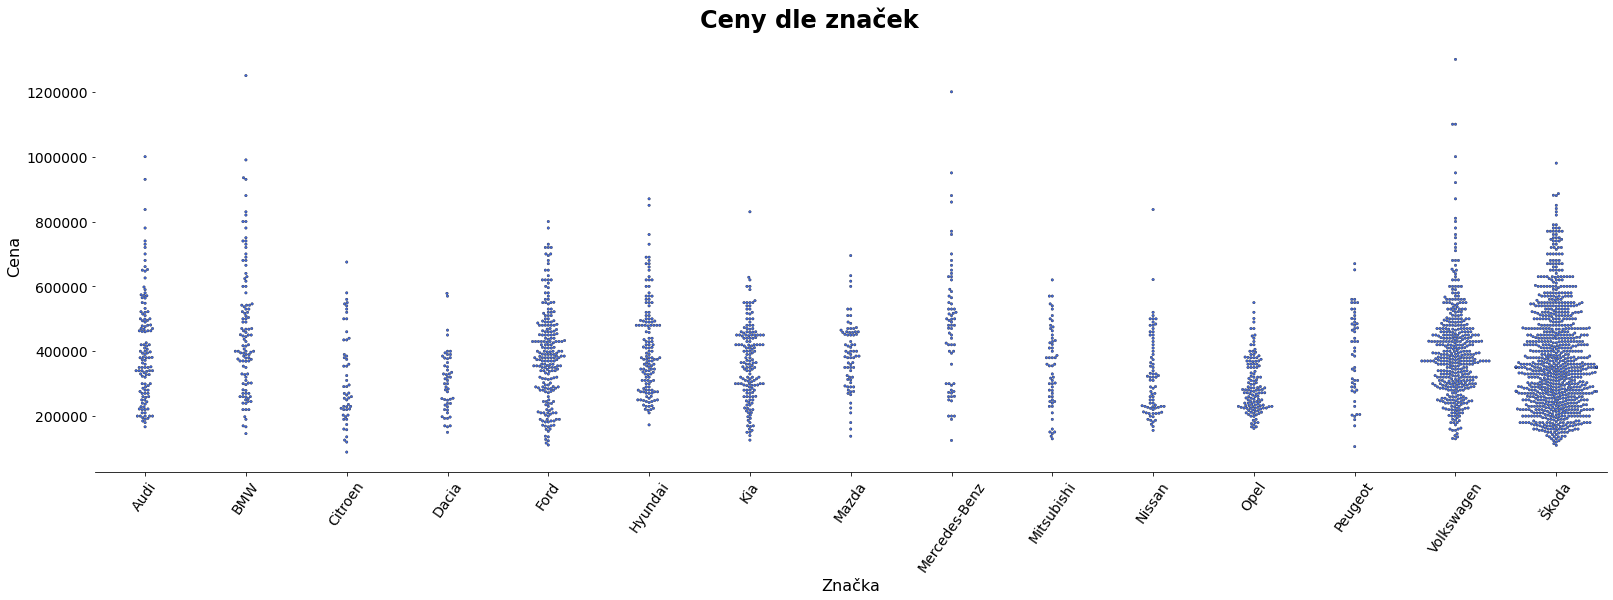

In [10]:
fig = plt.figure(figsize=(21, 6))

axes = fig.add_axes([0, 0, 1, 1])

sns.swarmplot(x=auta_nejcastejsi['znacka'], y=auta_nejcastejsi['cena'], ax=axes, color='#4169E1', size=2.5, linewidth=0.3, edgecolor='black')

axes.spines[['left', 'top', 'right']].set_visible(False)

axes.set_xlabel('Značka', color='black', fontsize=16)
axes.set_ylabel('Cena', color='black', fontsize=16)

plt.xticks(rotation=55, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

axes.text(5.5, 1400000, 'Ceny dle značek', color='black', fontsize=24, fontweight='bold')

fig.show()

## Rozdělení tachometru

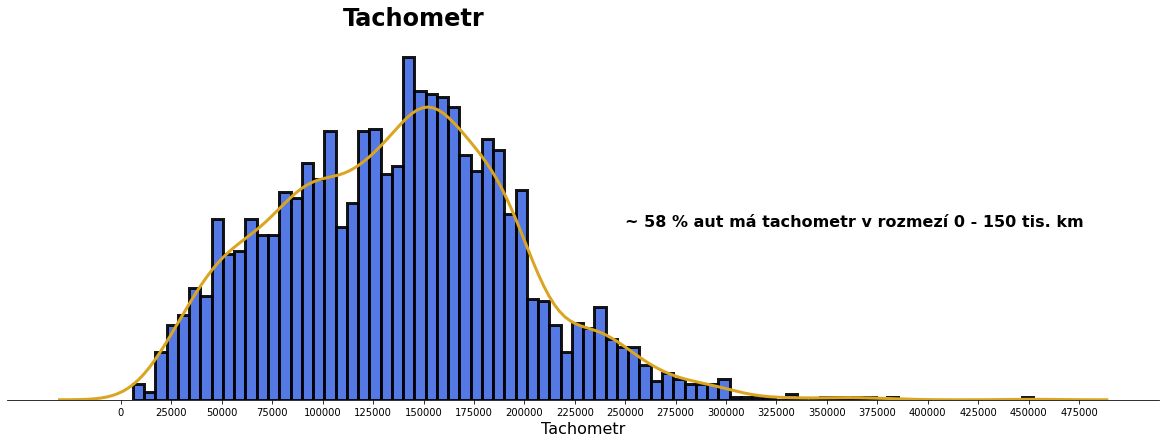

In [11]:
fig = plt.figure(figsize=(16, 5))
axes = fig.add_axes([0, 0, 1, 1])

sns.distplot(x=auta['tachometr'], color='#4169E1', hist_kws = dict(alpha=0.9, edgecolor='black', lw=3),
             kde_kws=dict(color='goldenrod', lw=3), bins=80)

axes.set_xlabel('Tachometr', color='black', fontsize=16)
axes.set_ylabel('')

axes.text(250000, 0.0000040, f'''~ {round(len(auta[auta['tachometr']<=150000])/len(auta)*100)} % aut má tachometr v rozmezí 0 - 150 tis. km''', fontsize=16, color='black', fontweight='bold')

axes.set_xticks(range(0,500000, 25000))
axes.set_yticks([])

axes.text(110000, 0.0000086, 'Tachometr', color='black', fontsize=24, fontweight='bold')

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
axes.spines[['right', 'top', 'left']].set_visible(False)

fig.show()

## Vztah ceny a tachometru

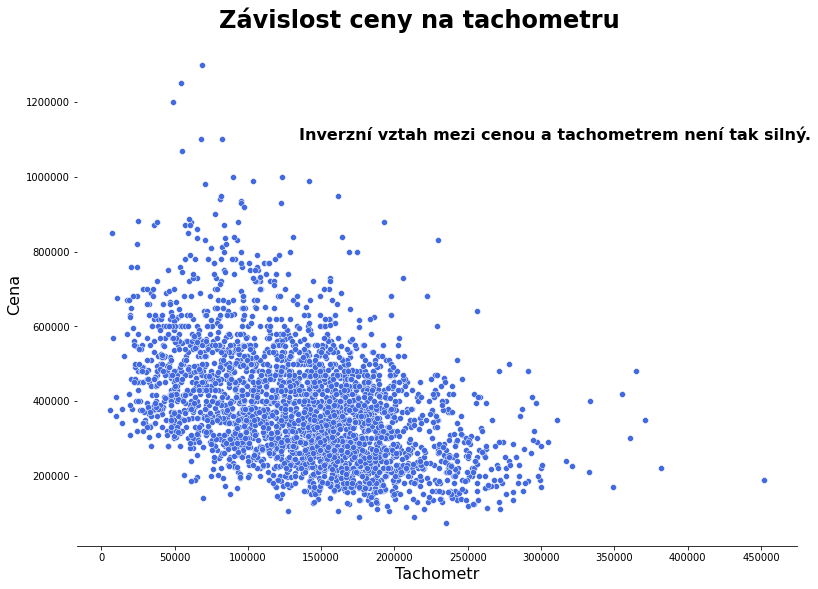

In [12]:
fig = plt.figure(figsize=(10, 7))
axes = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(x=auta['tachometr'], y=auta['cena'], color='#4169E1')

axes.spines[['right', 'top', 'left']].set_visible(False)

axes.set_xticks(range(0,500000, 50000))
#axes.set_yticks(range(0,100000, 10000))

axes.set_xlabel('Tachometr', color='black', fontsize=16)
axes.set_ylabel('Cena', color='black', fontsize=16)

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

axes.text(80000, 1400000, 'Závislost ceny na tachometru', color='black', fontsize=24, fontweight='bold')
axes.text(135000, 1100000, 'Inverzní vztah mezi cenou a tachometrem není tak silný.', fontsize=16, color='black', fontweight='bold')

fig.show()

## Vztah ceny a roku uvedení do provozu

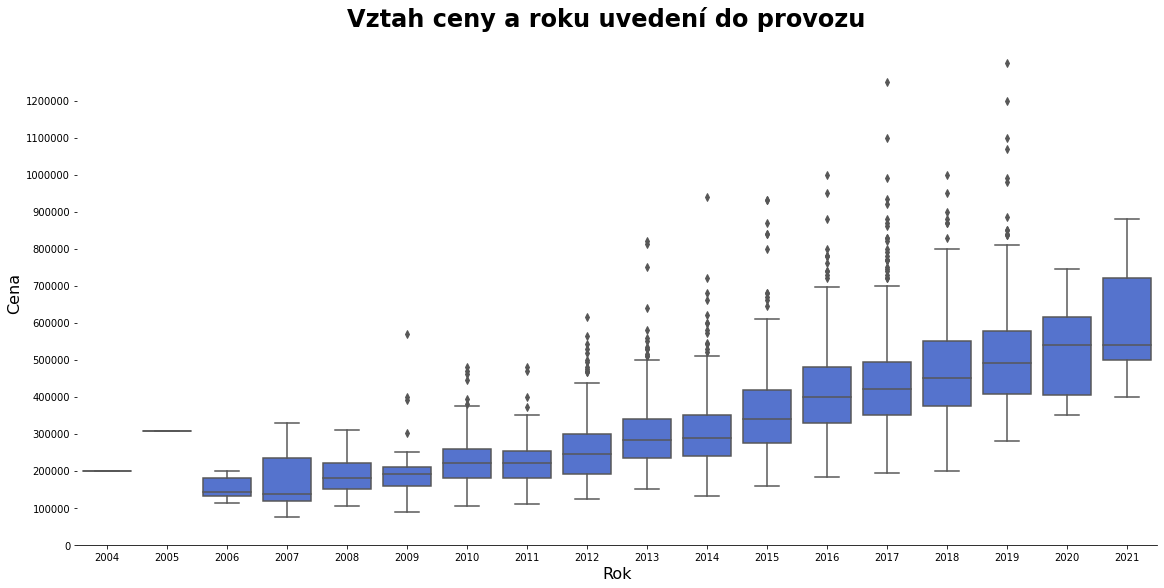

In [13]:
fig = plt.figure(figsize=(15, 7))
axes = fig.add_axes([0, 0, 1, 1])

sns.boxplot(x=auta['rok'], y=auta['cena'], color='#4169E1')

axes.spines[['right', 'top', 'left']].set_visible(False)

axes.set_yticks(range(0,1300000, 100000))

axes.set_xlabel('Rok', color='black', fontsize=16)
axes.set_ylabel('Cena', color='black', fontsize=16)

axes.text(4,1400000, 'Vztah ceny a roku uvedení do provozu', color='black', fontsize=24, fontweight='bold')

plt.ticklabel_format(style='plain', axis='y', useOffset=False)

## Počet aut dle roku uvedení do provozu

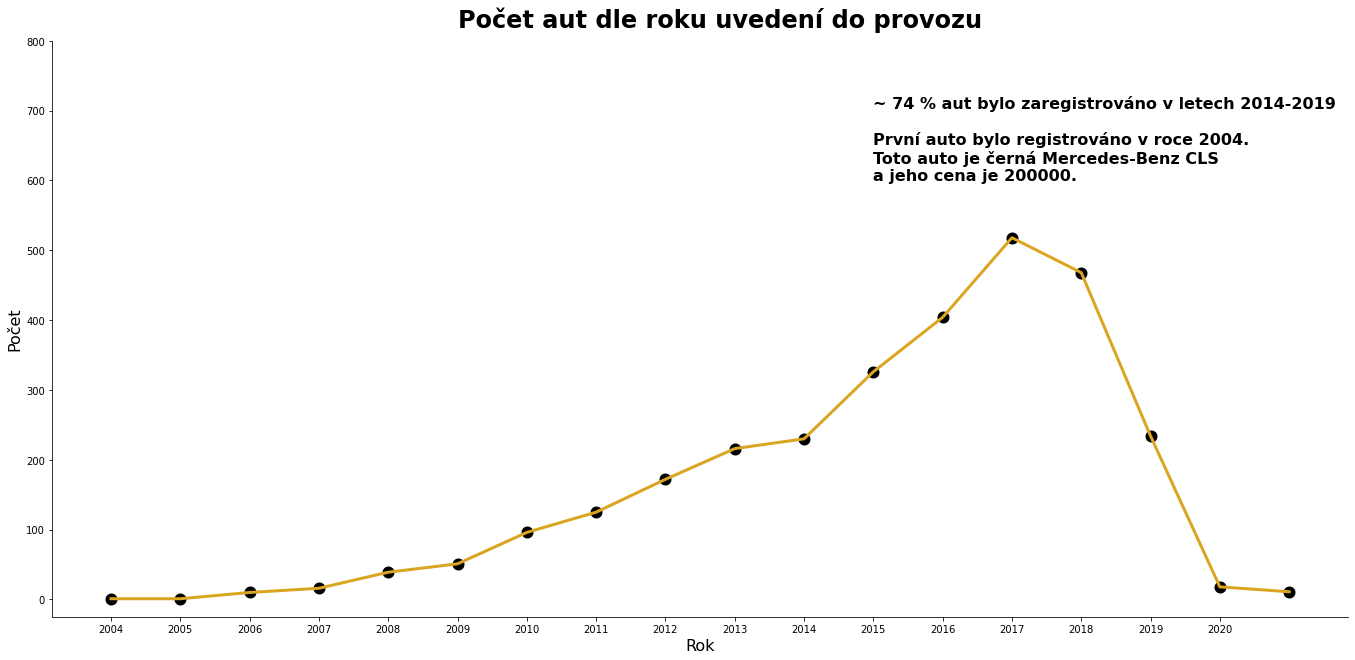

In [14]:
roky_pocet = auta['rok'].value_counts().reset_index()
roky_pocet.rename(columns={'index':'rok', 'rok':'pocet'}, inplace=True)
roky_pocet['procenta'] = roky_pocet['pocet']/sum(roky_pocet['pocet'])*100

fig = plt.figure(figsize=(18, 8))
axes = fig.add_axes([0, 0, 1, 1])


sns.lineplot(x=roky_pocet['rok'], y=roky_pocet['pocet'], ax=axes, color='goldenrod', lw=3)
axes.scatter(x=roky_pocet['rok'], y=roky_pocet['pocet'], color='black', lw=6)

axes.set_xlabel('Rok', color='black', fontsize=16)
axes.set_ylabel('Počet', color='black', fontsize=16)

axes.spines[['right', 'top']].set_visible(False)

plt.xticks(range(roky_pocet['rok'].min(), roky_pocet['rok'].max()), rotation=0)
plt.yticks(range(0, 900, 100))

axes.text(2015, 600, 
          f'''~ {round(sum(roky_pocet['procenta'][:6]))} % aut bylo zaregistrováno v letech 2014-2019
          
První auto bylo registrováno v roce {auta['rok'].min()}. 
Toto auto je {auta.sort_values(by='rok').reset_index()['barva'][0]} {auta.sort_values(by='rok').reset_index()['model'][0]} 
a jeho cena je {auta.sort_values(by='rok').reset_index()['cena'][0]}.''', fontsize=16, color='black', fontweight='bold')


axes.text(2009, 820, 'Počet aut dle roku uvedení do provozu', color='black', fontsize=24, fontweight='bold')

fig.show()

## Počet aut dle 15 nejčastějších barev

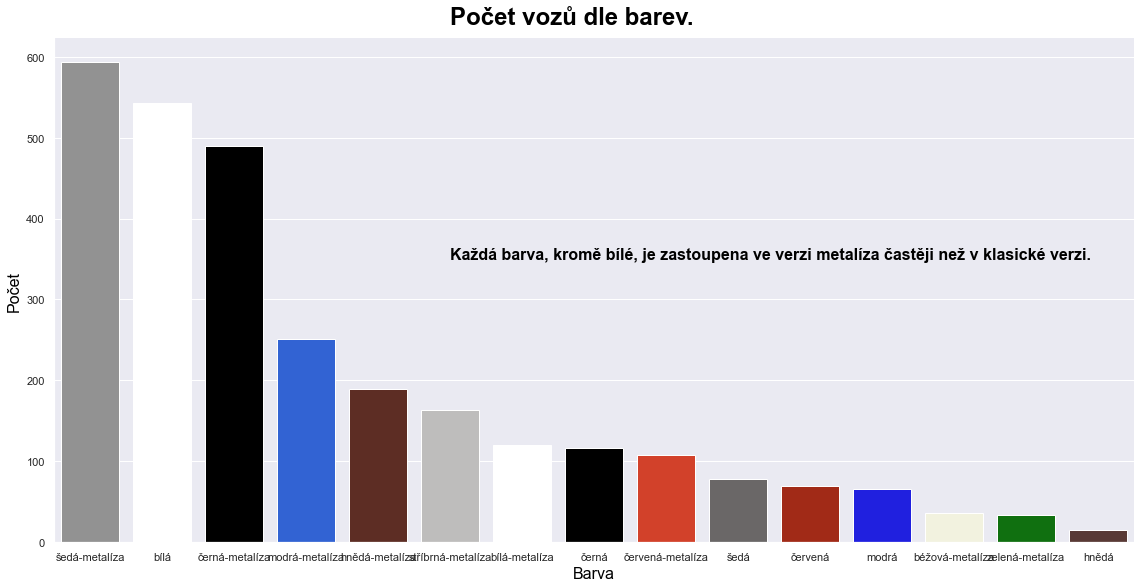

In [15]:
auta_dle_barvy = auta.groupby('barva')['id'].count().reset_index().sort_values('id',ascending = False)[:15]
auta_dle_barvy = auta_dle_barvy.rename(columns = {'id':'pocet'})
sns.set()
fig = plt.figure(figsize=(15, 7))
axes = fig.add_axes([0, 0, 1, 1])

color=['#929292', 'white', 'black', '#1758EE', '#66261B', '#BEBDBC', 'white', 'black', '#EE2D0E', '#6A6767', '#B81900', 'blue', 'beige', 'green', '#5F362F']
sns.barplot(x=auta_dle_barvy['barva'], y=auta_dle_barvy['pocet'], palette=color)

axes.text(5,640, 'Počet vozů dle barev.', color='black', fontsize=24, fontweight='bold')
axes.text(5,350, 'Každá barva, kromě bílé, je zastoupena ve verzi metalíza častěji než v klasické verzi.', color='black', fontsize=16, fontweight='bold')

axes.set_xlabel('Barva', color='black', fontsize=16)
axes.set_ylabel('Počet', color='black', fontsize=16)

axes.spines[['right', 'top']].set_visible(False)

fig.show()

# Predikce ceny - ML model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [103]:
auta_predikce_ceny = auta.copy()
auta_predikce_ceny.head()

,id,znacka,model,cena,rok,tachometr,motor,prevodovka,barva,karoserie,palivo
0,"Alfa Romeo 159, 2007_371",Alfa Romeo,Alfa Romeo 159,74000,2007,235177,110,Manuál,stříbrná-metalíza,Combi,Diesel
1,"Alfa Romeo 159, 2008_1894",Alfa Romeo,Alfa Romeo 159,106000,2008,196092,110,Automat,šedá-metalíza,Combi,Diesel
2,"Alfa Romeo Giulietta, 2018_2882",Alfa Romeo,Alfa Romeo Giulietta,311000,2018,84788,88,Manuál,šedá-metalíza,Hatchback,Diesel
3,"Audi A3, 2009_2688",Audi,Audi A3,180000,2009,199896,118,Manuál,šedá-metalíza,Hatchback,Benzín
4,"Audi A3, 2009_2765",Audi,Audi A3,200000,2009,122236,75,Automat,bílá,Hatchback,Benzín


In [18]:
auta_predikce = pd.get_dummies(auta_predikce_ceny, columns = ['prevodovka', 'barva','karoserie','palivo','znacka']).drop(['id','model'], axis = 1)
auta_predikce.head()

,cena,rok,tachometr,motor,prevodovka_Automat,prevodovka_Manuál,barva_béžová,barva_béžová-metalíza,barva_bílá,barva_bílá-metalíza,...,znacka_Opel,znacka_Peugeot,znacka_Renault,znacka_Seat,znacka_Subaru,znacka_Suzuki,znacka_Toyota,znacka_Volkswagen,znacka_Volvo,znacka_Škoda
0,74000,2007,235177,110,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106000,2008,196092,110,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,311000,2018,84788,88,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180000,2009,199896,118,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200000,2009,122236,75,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
auta_predikce = pd.get_dummies(auta_predikce_ceny, columns = ['prevodovka', 'barva','karoserie','palivo','znacka'])
auta_predikce.head()

,id,model,cena,rok,tachometr,motor,prevodovka_Automat,prevodovka_Manuál,barva_béžová,barva_béžová-metalíza,...,znacka_Opel,znacka_Peugeot,znacka_Renault,znacka_Seat,znacka_Subaru,znacka_Suzuki,znacka_Toyota,znacka_Volkswagen,znacka_Volvo,znacka_Škoda
0,"Alfa Romeo 159, 2007_371",Alfa Romeo 159,74000,2007,235177,110,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Alfa Romeo 159, 2008_1894",Alfa Romeo 159,106000,2008,196092,110,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Alfa Romeo Giulietta, 2018_2882",Alfa Romeo Giulietta,311000,2018,84788,88,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Audi A3, 2009_2688",Audi A3,180000,2009,199896,118,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Audi A3, 2009_2765",Audi A3,200000,2009,122236,75,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
x = auta_predikce_ceny['id'].str.split('_',expand=True)[1]
auta_predikce_ceny['id'] = x

In [19]:
numericke_promenne = [ele for ele in auta_predikce.select_dtypes('int64')]
kategoricke_promenne = [ele for ele in auta_predikce.select_dtypes('uint8')]

In [20]:
auta_predikce[numericke_promenne]

,cena,rok,tachometr,motor
0,74000,2007,235177,110
1,106000,2008,196092,110
2,311000,2018,84788,88
3,180000,2009,199896,118
4,200000,2009,122236,75
...,...,...,...,...
2931,328000,2016,92427,92
2932,276000,2016,154613,110
2933,365000,2016,134560,81
2934,330000,2017,147493,81


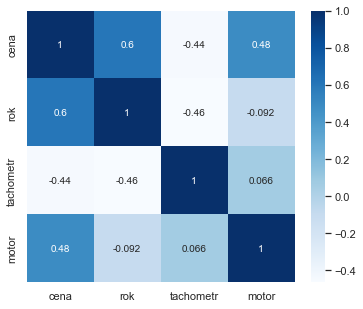

In [21]:
sns.set(rc={'figure.figsize':(6,5)})

korelacni_matice = auta_predikce[numericke_promenne].corr(method ='pearson')

sloupce = numericke_promenne

ax = sns.heatmap(korelacni_matice, annot=True,
                 yticklabels=sloupce,
                 xticklabels=sloupce,
                 annot_kws={'size':10},
                 cmap="Blues")

In [22]:
X = auta_predikce.drop(['cena'], axis = 1).values
X_cols = auta_predikce.drop(['cena'], axis = 1)
y = auta_predikce['cena']

print(X.shape)
print(y.shape)

(2936, 88)
(2936,)


#### Vybrání nejdůležitějších proměnných pro model (feature importance)

In [23]:
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [24]:
dt.feature_importances_

array([1.86484615e-01, 3.10444052e-01, 2.34308419e-01, 6.44556964e-03,
       3.25972276e-02, 0.00000000e+00, 0.00000000e+00, 1.17109787e-02,
       5.26085202e-04, 1.11815145e-04, 3.85571996e-04, 1.81426363e-04,
       1.42852900e-03, 6.06862891e-04, 2.67184806e-03, 0.00000000e+00,
       1.54019073e-04, 1.81426363e-04, 2.41715193e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.16336029e-03, 1.09360779e-02, 1.76826690e-03,
       7.35584368e-04, 5.37251674e-04, 1.44078788e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.07645240e-02, 0.00000000e+00, 1.29140493e-02, 0.00000000e+00,
       4.19853292e-04, 7.71143991e-04, 0.00000000e+00, 1.29255040e-03,
       3.29637624e-02, 2.60368102e-03, 0.00000000e+00, 6.45822978e-04,
       1.49827040e-02, 1.11815145e-04, 2.00656383e-02, 0.00000000e+00,
       3.83232600e-04, 0.00000000e+00, 9.42308328e-04, 2.00345922e-03,
      

In [25]:
for i, column in enumerate(auta_predikce.drop('cena', axis=1)):
    print('Důležitost proměnné {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Proměnná': [column], 'Důležitost proměnné skóre': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# seřazení
final_fi = final_fi.sort_values('Důležitost proměnné skóre', ascending = False).reset_index()

Důležitost proměnné rok:, 0.186
Důležitost proměnné tachometr:, 0.310
Důležitost proměnné motor:, 0.234
Důležitost proměnné prevodovka_Automat:, 0.006
Důležitost proměnné prevodovka_Manuál:, 0.033
Důležitost proměnné barva_béžová:, 0.000
Důležitost proměnné barva_béžová-metalíza:, 0.000
Důležitost proměnné barva_bílá:, 0.012
Důležitost proměnné barva_bílá-metalíza:, 0.001
Důležitost proměnné barva_fialová:, 0.000
Důležitost proměnné barva_fialová-metalíza:, 0.000
Důležitost proměnné barva_hnědá:, 0.000
Důležitost proměnné barva_hnědá-metalíza:, 0.001
Důležitost proměnné barva_modrá:, 0.001
Důležitost proměnné barva_modrá-metalíza:, 0.003
Důležitost proměnné barva_oranžová:, 0.000
Důležitost proměnné barva_oranžová-metalíza:, 0.000
Důležitost proměnné barva_stříbrná:, 0.000
Důležitost proměnné barva_stříbrná-metalíza:, 0.002
Důležitost proměnné barva_vínová:, 0.000
Důležitost proměnné barva_vínová-metalíza:, 0.000
Důležitost proměnné barva_zelená:, 0.000
Důležitost proměnné barva_zelená

In [26]:
final_fi.head()

,index,Proměnná,Důležitost proměnné skóre
0,1,tachometr,0.310444
1,2,motor,0.234308
2,0,rok,0.186485
3,44,karoserie_SUV,0.032964
4,4,prevodovka_Manuál,0.032597


In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

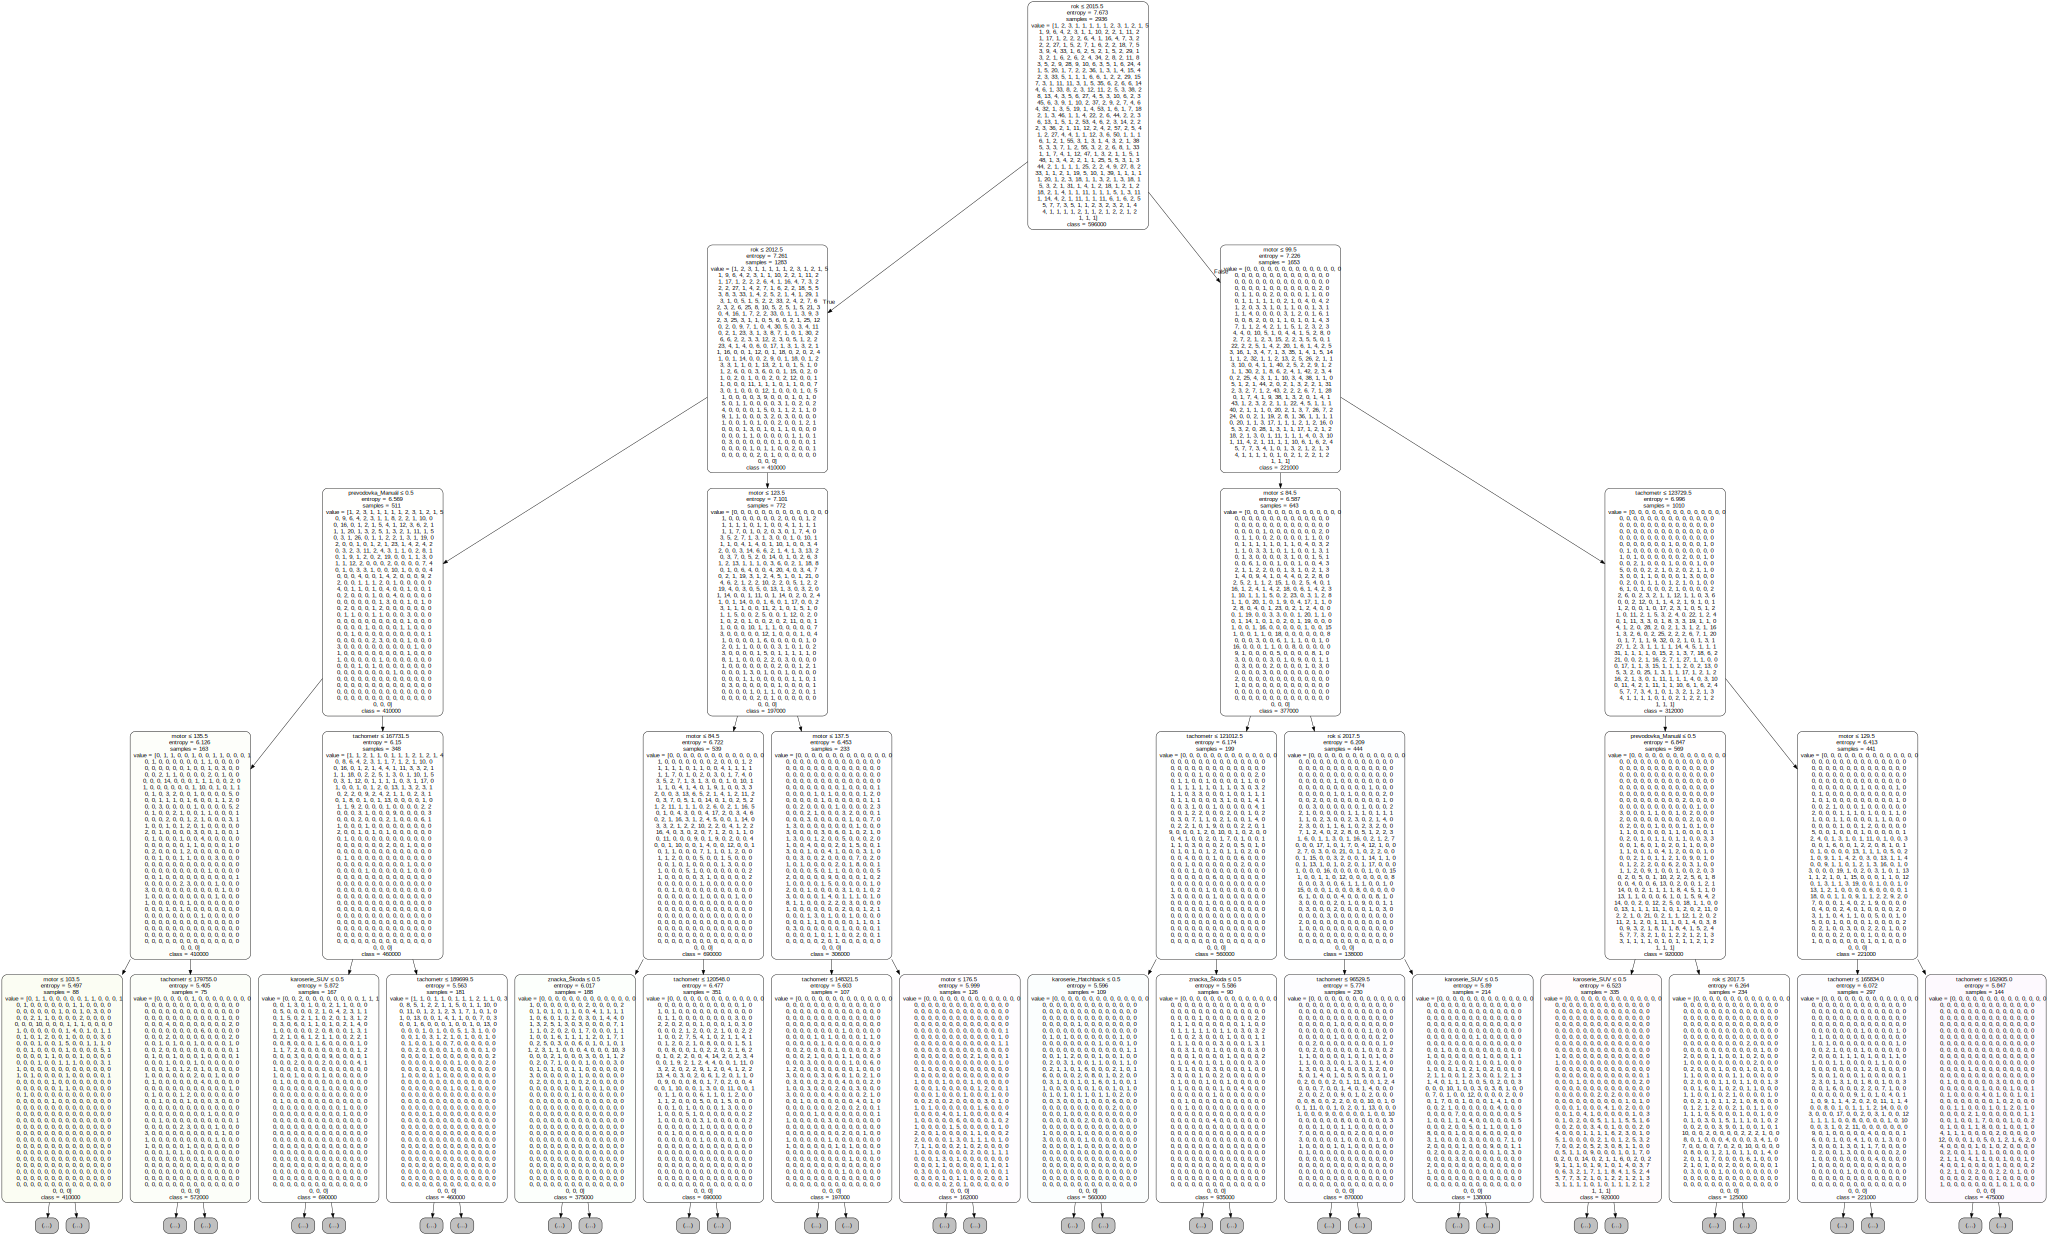

In [28]:
data = tree.export_graphviz(dt, out_file=None, 
    feature_names=auta_predikce.drop('cena', axis=1).columns,    
    class_names=auta_predikce['cena'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True, max_depth=4)
graf = graphviz.Source(data)
graf

#### Train test split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2348, 88)
(588, 88)
(2348,)
(588,)


#### Lineární regrese - model na všech proměnných

In [30]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

#### Evaluace modelu

In [31]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
# Přesnost modelu na training datech
print('Přesnost modelu na training datech je',r2_score(y_train,y_pred) )   
# Přesnost modelu na testing datech
print('Přesnost modelu na testing datech je: ', lm.score(X_test, y_test) )

print("")
# Root Mean Squared Error (RMSE)
print('RMSE  na training datech je: ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE  na testing datech je: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# Mean Absolute Error (MAE)
print('MAE  na training datech je: ',mean_absolute_error(y_train,y_pred))
print('MAE  na testing datech je: ',mean_absolute_error(y_test,lm.predict(X_test)))

Přesnost modelu na training datech je 0.8503881710146148
Přesnost modelu na testing datech je:  0.8148222348495929

RMSE  na training datech je:  60457.449727280204
RMSE  na testing datech je:  62588.78530232601

MAE  na training datech je:  44785.60985275895
MAE  na testing datech je:  47467.54570207673


#### Lineární regrese - model na prvních 10 nejdůležitejších proměnných

In [33]:
final_fi['Proměnná'][0:10].values

array(['tachometr', 'motor', 'rok', 'karoserie_SUV', 'prevodovka_Manuál',
       'znacka_Škoda', 'karoserie_Combi', 'palivo_Diesel',
       'palivo_Benzín', 'barva_šedá-metalíza'], dtype=object)

In [34]:
test1 = final_fi['Proměnná'][0:10].values

X2 = auta_predikce[test1].values
y2 = auta_predikce['cena']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)

print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)

# Přesnost modelu na testing datech 
print('Přesnost modelu na testing datech je: ', lm2.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(2936, 88)
(2936,)
Přesnost modelu na testing datech je:  0.7501989393833998
RMSE na testing datech je:  76341.8722734958
MAE na testing datech je:  58001.8657157424


#### Model se nám s nižším počtem proměnných zhoršil.

#### Další metoda pro eliminaci proměnných - Recursive Feature Elimination (na modelu lineární regresse)
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [35]:
from sklearn.feature_selection import RFE

In [36]:
selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Vybraných nejlepších 10 proměnných dle RFE:',X_cols.columns[selector.support_])

rfe_lr = X_cols.columns[selector.support_]

Vybraných nejlepších 10 proměnných dle RFE: Index(['prevodovka_Automat', 'prevodovka_Manuál', 'karoserie_Coupe',
       'karoserie_Hatchback', 'karoserie_Rodinné vozy', 'palivo_Benzín',
       'palivo_CNG', 'palivo_Diesel', 'palivo_Hybrid', 'palivo_LPG'],
      dtype='object')


In [37]:
test1 = rfe_lr

X2 = auta_predikce[test1].values
y2 = auta_predikce['cena']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)

print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)

# Přesnost modelu na testing datech 
print('Přesnost modelu na testing datech je: ', lm2.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(2936, 88)
(2936,)
Přesnost modelu na testing datech je:  0.20277257609723986
RMSE na testing datech je:  136381.91446441715
MAE na testing datech je:  107838.13605442178


#### Model se nám pomocí RFE zhoršil ještě víc - místo eliminace proměnných pro LR je vhodné zkusit jiný algoritmus

### Random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Přesnost modelu na testing datech
print('Přesnost modelu na testing datech je: ', regr.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,regr.predict(X_test)))

Přesnost modelu na testing datech je:  0.49702358894165966
RMSE na testing datech je:  108327.68858662514
MAE na testing datech je:  82571.06769228223


#### Optimalizace Random forestu

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [43]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200, random_state=0)

In [45]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('Přesnost modelu na testing datech je: ', regr.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,regr.predict(X_test)))

Přesnost modelu na testing datech je:  0.493229861454084
RMSE na testing datech je:  108735.4549317918
MAE na testing datech je:  84357.31383701654


### XG Boost

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

print('Přesnost modelu na testing datech je: ', reg.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,reg.predict(X_test)))

Přesnost modelu na testing datech je:  0.8608665855288684
RMSE na testing datech je:  56974.6137188163
MAE na testing datech je:  42724.42506691052


#### Optimalizace XG Boost (hyperparameter tuning)

In [50]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [51]:
params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


In [52]:
clf.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 1000}

In [53]:
xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('Přesnost modelu na testing datech je: ', xgbr.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

Přesnost modelu na testing datech je:  0.8783356931791487
RMSE na testing datech je:  53277.91992741245
MAE na testing datech je:  39951.80268122874


### Optimalizovaný XG Boost si vede nejlépe

In [134]:
X = auta_predikce.drop(['cena', 'model','id'], axis = 1).values
X_cols = auta_predikce.drop(['cena', 'model','id'], axis = 1)
y = auta_predikce['cena']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_train)

print('Přesnost modelu na testing datech je: ', xgbr.score(X_test, y_test) )
print('RMSE na testing datech je: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('MAE na testing datech je: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

(2936, 88)
(2936,)
(2348, 88)
(588, 88)
(2348,)
(588,)
Přesnost modelu na testing datech je:  0.8783356931791487
RMSE na testing datech je:  53277.91992741245
MAE na testing datech je:  39951.80268122874


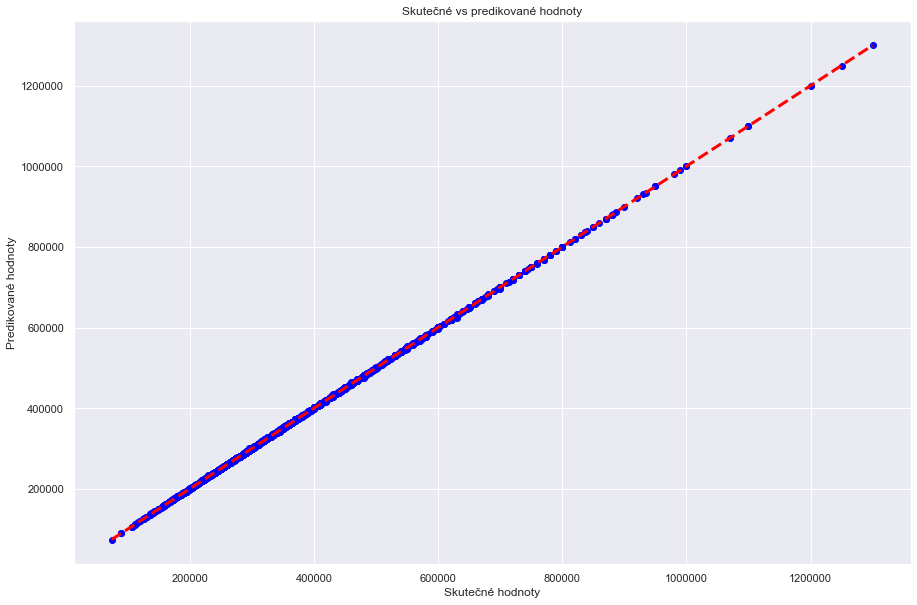

In [63]:
plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Skutečné hodnoty')
plt.ylabel('Predikované hodnoty')
plt.title('Skutečné vs predikované hodnoty')

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

In [118]:
df_final = pd.DataFrame(X_train, columns = X_cols.columns)

In [119]:
final_df = pd.DataFrame(X_train, columns = X_cols.columns)
final_df['Cena'] = y_train.values
final_df['Data'] = 'Stávající data'
final_df['Predikce ceny'] = y_pred
final_df.head()

,id,rok,tachometr,motor,prevodovka_Automat,prevodovka_Manuál,barva_béžová,barva_béžová-metalíza,barva_bílá,barva_bílá-metalíza,...,znacka_Seat,znacka_Subaru,znacka_Suzuki,znacka_Toyota,znacka_Volkswagen,znacka_Volvo,znacka_Škoda,Cena,Data,Predikce ceny
0,1245,2016,124267,110,0,1,0,0,0,0,...,0,0,0,0,0,0,0,340000,Stávající data,340136.031250
1,12,2021,8010,110,0,1,0,0,0,0,...,0,0,0,0,0,0,0,570010,Stávající data,569975.812500
2,841,2016,192297,110,0,1,0,0,1,0,...,0,0,0,0,0,0,0,245000,Stávající data,245011.015625
3,2454,2013,123495,103,1,0,0,0,1,0,...,0,0,0,0,1,0,0,360000,Stávající data,359925.625000
4,98,2016,94647,132,1,0,0,0,0,0,...,0,0,0,0,0,0,0,354000,Stávající data,354096.812500


In [122]:
final_df2 = pd.DataFrame(X_test, columns = X_cols.columns)
final_df2['Cena'] = y_test.values
final_df2['Data'] = 'Nová data'
final_df2['Predikce ceny'] = xgbr.predict(X_test)
final_df2.head()

,id,rok,tachometr,motor,prevodovka_Automat,prevodovka_Manuál,barva_béžová,barva_béžová-metalíza,barva_bílá,barva_bílá-metalíza,...,znacka_Seat,znacka_Subaru,znacka_Suzuki,znacka_Toyota,znacka_Volkswagen,znacka_Volvo,znacka_Škoda,Cena,Data,Predikce ceny
0,2023,2016,167650,88,0,1,0,0,0,0,...,0,0,0,0,0,0,0,315000,Nová data,344853.625000
1,1947,2008,123148,105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,151000,Nová data,144862.671875
2,127,2018,142318,110,0,1,0,0,1,0,...,0,0,0,0,0,0,1,468000,Nová data,461766.625000
3,2249,2016,355525,103,0,1,0,0,0,0,...,0,0,0,0,1,0,0,420000,Nová data,326707.406250
4,2188,2018,175478,110,1,0,0,0,0,0,...,0,0,0,0,0,0,0,400000,Nová data,493190.937500


In [123]:
# union

final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)

(2936, 92)


In [132]:
# left join

final_df4 = auta_predikce_ceny.merge(final_df3[['id','Data','Predikce ceny']], how='left', on='id')
final_df4['Predikce ceny'] = final_df4['Predikce ceny'].astype(int)
final_df4.head()

,id,znacka,model,cena,rok,tachometr,motor,prevodovka,barva,karoserie,palivo,Data,Predikce ceny
0,371,Alfa Romeo,Alfa Romeo 159,74000,2007,235177,110,Manuál,stříbrná-metalíza,Combi,Diesel,Stávající data,74019
1,1894,Alfa Romeo,Alfa Romeo 159,106000,2008,196092,110,Automat,šedá-metalíza,Combi,Diesel,Stávající data,106013
2,2882,Alfa Romeo,Alfa Romeo Giulietta,311000,2018,84788,88,Manuál,šedá-metalíza,Hatchback,Diesel,Stávající data,311108
3,2688,Audi,Audi A3,180000,2009,199896,118,Manuál,šedá-metalíza,Hatchback,Benzín,Stávající data,180032
4,2765,Audi,Audi A3,200000,2009,122236,75,Automat,bílá,Hatchback,Benzín,Stávající data,200002


In [133]:
final_df4.to_csv('predikce_aut_vystup.csv',encoding='utf-8-sig')